In [ ]:
!top

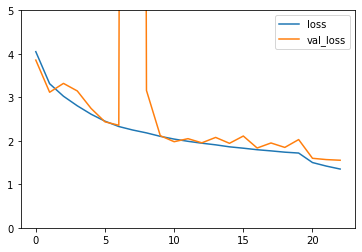

In [2]:
import matplotlib.pyplot as plt
import pandas

data = pandas.read_csv("checkpoint/efficientnet-b7/efficientnet-b7-211213-122612.csv")

plt.ylim(0, 5)
plt.plot(data["loss"], label="loss")
plt.plot(data["val_loss"], label="val_loss")
plt.legend()
plt.show()

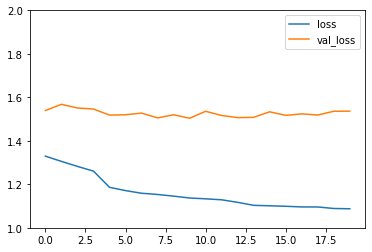

In [6]:
data = pandas.read_csv("checkpoint/efficientnet-b7/efficientnet-b7-211213-232650.csv")

plt.ylim(1, 2)
plt.plot(data["loss"], label="loss")
plt.plot(data["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [1]:
import dataset
import glob
import json
import matplotlib.pyplot as plt
import os
import time

import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_datasets as tfds

In [2]:
 train_ds, val_ds, test_ds = tfds.load("voice_ds", \
            split=["train[:80%]", "train[80%:]", "test"], \
            shuffle_files=True)

In [6]:
for audio in test_ds.take(1):
    print( tf.audio.decode_wav(audio["audio"].numpy(), desired_channels=1))

DecodeWav(audio=<tf.Tensor: shape=(100800, 1), dtype=float32, numpy=
array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-0.00244141],
       [-0.00241089],
       [-0.00219727]], dtype=float32)>, sample_rate=<tf.Tensor: shape=(), dtype=int32, numpy=48000>)


In [4]:
train_ds = preprocess_dataset(train_ds)
val_ds = preprocess_dataset(val_ds)
test_ds = preprocess_dataset(test_ds)

train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)

train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.experimental.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.experimental.AUTOTUNE)

NameError: name 'preprocess_dataset' is not defined

In [10]:
from models.efficientnet import model_name, batch_size, preprocess_dataset, get_model
train_ds = preprocess_dataset(train_ds)

In [11]:
for audio, labels in train_ds.take(1):
    print(audio.shape)

[2021-11-01 05:44:43.661 ip-172-31-95-224:776 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-11-01 05:44:43.689 ip-172-31-95-224:776 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
(498, 32, 3)


Text(24.578124999999996, 0.5, 'Actual Class')

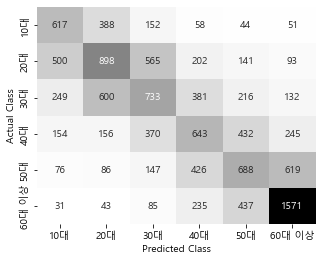

In [39]:
import dataset
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

plt.rcParams['font.family'] = "Malgun Gothic"
plt.figure(figsize=(5,4))

arr = [[ 617,  388,  152,   58,   44,   51],
        [ 500,  898,  565,  202,  141,   93],
        [ 249,  600,  733,  381,  216,  132],
        [ 154,  156,  370,  643,  432,  245],
        [  76,   86,  147,  426,  688,  619],
        [  31,   43,   85,  235,  437, 1571]]

age_list = ["10대", "20대", "30대", "40대", "50대", "60대 이상"]
df_cm = pd.DataFrame(arr, index=age_list, columns=age_list)
plot = seaborn.heatmap(df_cm, cmap="Greys", annot=True, fmt="", cbar=False)
plot.set_xlabel("Predicted Class")
plot.set_ylabel("Actual Class")